**I**  have  provided  a  dataset  which  has  a  number  of  features  and  a  single  target (column called ``target'').  Your  task  is  to  use  neural  networks  to address  this  regression problem.

Import the dataset using Pandas as follows:

```
pandas.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa")
```

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential #create model
from tensorflow.keras.layers import Dense #add layers to model
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error #to calculate mse
from sklearn.model_selection import train_test_split #to split the data
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(1337) # for reproducibility

In [ ]:
df = pd.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa") #reading the data
df = pd.DataFrame(df)
df #data check

,var1,var2,var3,var4,var5,var6,var7,var8,target
0,1080.0,0.0,0.0,324.0,5.0,2080.0,1352.0,56,79.99
1,1080.0,0.0,0.0,324.0,5.0,2110.0,1352.0,56,61.89
2,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,540,40.27
3,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,730,41.05
4,397.2,264.8,0.0,384.0,0.0,1956.8,1651.0,720,44.30
...,...,...,...,...,...,...,...,...,...
1025,552.8,232.0,180.6,359.2,17.8,1740.2,1536.6,56,44.28
1026,644.4,0.0,231.2,392.0,20.8,1635.8,1626.8,56,31.18
1027,297.0,278.8,217.2,385.4,12.2,1784.8,1560.0,56,23.70
1028,318.2,373.4,0.0,351.2,22.6,1979.2,1577.8,56,32.77


In [ ]:
df = StandardScaler().fit_transform(df.values) #normalizing the data

In [ ]:
X =  df[:,0:8] #features
Y =  df[:,8:] #Target

In [ ]:
X = pd.DataFrame(X) #re-checking the data shape after reshaping
Y = pd.DataFrame(Y) 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7776) #spliting the data into traning and testing

In [ ]:
#creating the model
def NNL():
    model = Sequential()
    model.add(Dense(units = 16, input_dim=8, activation='relu'))
    model.add(Dense(units = 12, activation='relu'))
    model.add(Dense(units = 8, activation='relu'))

    # add a fully connected layer for the output
    model.add(Dense(units=1, activation='relu'))
                                                 
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [ ]:
model = NNL() #initializing the model
model.summary() #checking model parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 12)                204       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=20, verbose=1) #training the model

Epoch 1/30
181/181 [==============================] - 1s 1ms/step - loss: 1.0355 - mean_squared_error: 1.0355
Epoch 2/30
181/181 [==============================] - 0s 1ms/step - loss: 1.0255 - mean_squared_error: 1.0255
Epoch 3/30
181/181 [==============================] - 0s 2ms/step - loss: 0.8478 - mean_squared_error: 0.8478
Epoch 4/30
181/181 [==============================] - 0s 1ms/step - loss: 0.6824 - mean_squared_error: 0.6824
Epoch 5/30
181/181 [==============================] - 0s 1ms/step - loss: 0.6242 - mean_squared_error: 0.6242
Epoch 6/30
181/181 [==============================] - 0s 2ms/step - loss: 0.5870 - mean_squared_error: 0.5870
Epoch 7/30
181/181 [==============================] - 0s 2ms/step - loss: 0.5683 - mean_squared_error: 0.5683
Epoch 8/30
181/181 [==============================] - 0s 1ms/step - loss: 0.5540 - mean_squared_error: 0.5540
Epoch 9/30
181/181 [==============================] - 0s 2ms/step - loss: 0.5447 - mean_squared_error: 0.5447
Epoch 10/3

In [ ]:
prediction = model.predict(X_test) #Testing the model

In [ ]:
print("MSE= "+str(mean_squared_error(Y_test, prediction))) #computing the mean squared error. Checking the performance of the model

MSE= 0.5593684275577835


In [ ]:
#Mean Absolute Error
print("MAE= "+str(mean_absolute_error( Y_test, prediction)))

MAE= 0.5718646460637958


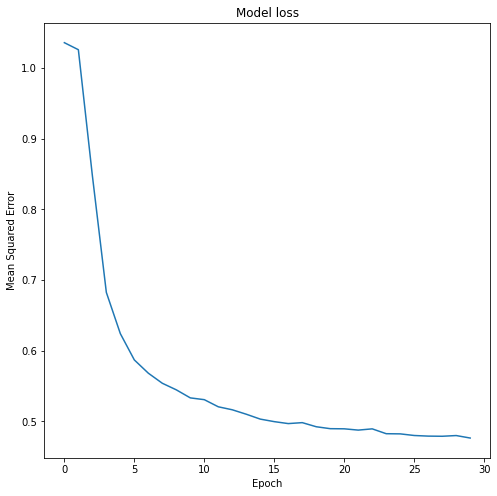

In [ ]:
#Ploting the Mean squared error for the model
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()